# Laboratorium 3
Mikołaj Sikora

In [1]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.conf import SparkConf
conf = SparkConf()
spark = SparkSession.builder.config(conf=conf).getOrCreate()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1637196446032_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-10-20/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
smog_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- attribution: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- averagingPeriod: struct (nullable = true)
 |    |-- unit: string (nullable = true)
 |    |-- value: double (nullable = true)
 |-- city: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |-- country: string (nullable = true)
 |-- date: struct (nullable = true)
 |    |-- local: string (nullable = true)
 |    |-- utc: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourceName: string (nullable = true)
 |-- sourceType: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)

In [4]:
smog_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3683301

In [2]:
smog_df.select('parameter').distinct().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'smog_df' is not defined
Traceback (most recent call last):
NameError: name 'smog_df' is not defined



In [3]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.install_pypi_package("kiwisolver==1.2.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc.install_pypi_package("chart_studio")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Running setup.py bdist_wheel for retrying: started
  Running setup.py bdist_wheel for retrying: finished with status 'done'
  Stored in directory: /var/lib/livy/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying

In [7]:
sc.install_pypi_package("iso3166")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
certifi                    2021.10.8
charset-normalizer         2.0.7    
chart-studio               1.1.0    
click                      7.1.2    
cycler                     0.11.0   
idna                       3.3      
iso3166                    2.0.2    
jmespath                   0.10.0   
joblib                     0.15.1   
kiwisolver                 1.2.0    
lxml                       4.5.1    
matplotlib                 3.1.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     0.25.1   
pip                        9.0.1    
plotly                     5.4.0    
py-dateutil                2.2      
pyparsing                  3.0.6    
python-dateutil            2.8.2    
python37-sagemaker-pyspark 1.3.0    
p

In [12]:
smog_df.select('country').distinct().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   country
0       DZ
1       FI
2       MN
3       MX
4       CZ
..     ...
88      PE
89      TH
90      MA
91      NO
92      AF

[93 rows x 1 columns]

In [8]:
from pyspark.sql.functions import col, asc, max as _max, mean as _mean

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
smog_df.filter(col('country')=='PL').select('city').distinct().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            city
0       Jarosław
1         Rybnik
2      Widuchowa
3           Łódź
4         Ustroń
..           ...
165     Szymbark
166        Tychy
167        Opole
168     Zielonka
169  Dzierżoniów

[170 rows x 1 columns]

## Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.


In [9]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-11-1*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
max_berlin = smog_df.select('city','parameter','value').where((col('city')=='Berlin') & (col('parameter')=='pm10')).agg(_max('value').alias('max')).collect()[0]['max']
max_berlin

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

48.49

In [13]:
smog_df.filter(col('country')=='PL').filter(col('parameter')=='pm10').select('city','value').groupBy('city').agg(_mean('value').alias('avg_value')).where(col('avg_value') < max_berlin).sort(col('avg_value').desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                 city  avg_value
0            Połaniec  48.429588
1    Wodzisław Śląski  48.409656
2              Milicz  47.918512
3             Wschowa  47.495655
4                Piła  47.318922
..                ...        ...
107            Słupsk  24.881977
108         Kołobrzeg  20.590901
109     Rymanów-Zdrój  20.347538
110            Elbląg  20.322959
111      Borsukowizna  15.272154

[112 rows x 2 columns]

## Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

In [14]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
def to_hour(s):
    return int(s['utc'][11:13])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
hour_udf = udf(to_hour, IntegerType())
smog_hour_df = smog_df.withColumn('hour', hour_udf('date'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
smog_hour_df.limit(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+------+----+
|_corrupt_record|         attribution|averagingPeriod| city|         coordinates|country|                date|            location|mobile|parameter|    sourceName|sourceType| unit| value|hour|
+---------------+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+------+----+
|           null|[[EPA AirNow DOS,...|   [hours, 1.0]|Kabul|[34.535812, 69.19...|     AF|[2021-08-15T20:00...|US Diplomatic Pos...| false|     pm25|StateAir_Kabul|government|µg/m³|-999.0|  15|
|           null|[[EPA AirNow DOS,...|   [hours, 1.0]|Kabul|[34.535812, 69.19...|     AF|[2021-08-15T21:00...|US Diplomatic Pos...| false|     pm25|StateAir_Kabul|government|µg/m³|-999.0|  16|
|           null|[[EPA AirNow DOS,.

In [18]:
query = smog_hour_df.filter(col('parameter')=='pm25').select('city','value','hour').groupBy(col('city'), col('hour')).agg(_max('value').alias('max_value')).sort(col('city').asc(), col('hour').asc())
query.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              city  hour  max_value
0              007     0       14.3
1              007     1       23.5
2              007     2       28.4
3              007     3       29.7
4              007     4       20.7
...            ...   ...        ...
30464   黔东南苗族侗族自治州    11       19.0
30465   黔南布依族苗族自治州    11        9.0
30466  黔西南布依族苗族自治州    11        5.0
30467        齐齐哈尔市    11       18.0
30468          龙岩市    11       10.0

[30469 rows x 3 columns]

In [19]:
query.where(col('city')=='Kraków').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      city  hour  max_value
0   Kraków     0    80.5691
1   Kraków     1    79.0396
2   Kraków     2    82.8847
3   Kraków     3    98.2722
4   Kraków     4    91.2012
5   Kraków     5    79.6178
6   Kraków     6    77.6698
7   Kraków     7    78.5382
8   Kraków     8    75.2280
9   Kraków     9    71.4684
10  Kraków    10    61.6529
11  Kraków    11    56.0092
12  Kraków    12    53.1326
13  Kraków    13    57.4635
14  Kraków    14    59.8380
15  Kraków    15    51.3685
16  Kraków    16    59.5821
17  Kraków    17    63.2304
18  Kraków    18    58.0755
19  Kraków    19    65.3097
20  Kraków    20    67.6447
21  Kraków    21    69.3360
22  Kraków    22    74.1924
23  Kraków    23    77.2209

## Znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego.

In [20]:
N = 3

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

windowSpec  = Window.partitionBy("city").orderBy(col("value").asc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
smog_df.filter(col('parameter')=='pm25').select('city', 'value', 'date').withColumn("row_number",row_number().over(windowSpec)).where((col('city').rlike('^[A-Za-z]+$')) & (col('row_number')<N)).groupBy(col('city')).agg(_mean('value').alias('mean_value')).orderBy(col('mean_value').desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           city  mean_value
0        Bhilai      999.99
1    Ballabgarh       61.82
2         Katni       60.00
3     Singrauli       55.00
4         Noida       54.00
..          ...         ...
840      Velsen     -999.00
841      Bamako     -999.00
842     Chennai     -999.00
843     Colombo     -999.00
844    Shanghai    -9999.00

[845 rows x 2 columns]

## Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

In [23]:
def to_day(s):
    return int(s['utc'][8:10])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
day_udf = udf(to_day, IntegerType())
smog_day_df = smog_df.withColumn('day', day_udf('date'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [77]:
def get_by_country(country):
    return smog_day_df.filter(col('country')==country).filter(col('parameter')=='pm10').select('coordinates', 'city', 'day', 'value').groupBy(col('day')).agg(_mean('value').alias('avg_value')).orderBy('day').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
polish_results = get_by_country("PL")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
mexico_results = get_by_country("MX")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
czech_results = get_by_country("CZ")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
finland_results = get_by_country("FI")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
polish_results

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(day=9, avg_value=39.48492583038867), Row(day=10, avg_value=38.36259704647439), Row(day=11, avg_value=42.59305598684917), Row(day=12, avg_value=43.207944912936256), Row(day=13, avg_value=44.74465262948206), Row(day=14, avg_value=44.13317878356692), Row(day=15, avg_value=38.083029006374474), Row(day=16, avg_value=47.91215125104859), Row(day=17, avg_value=42.77238829962852)]

In [81]:
czech_results

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(day=9, avg_value=32.19988726042841), Row(day=10, avg_value=26.483072752490227), Row(day=11, avg_value=28.472729927007304), Row(day=12, avg_value=29.208893651218855), Row(day=13, avg_value=26.954223662107033), Row(day=14, avg_value=30.315543265353156), Row(day=15, avg_value=39.62007874015747), Row(day=16, avg_value=37.39908095178143), Row(day=17, avg_value=41.60623441396509)]

In [82]:
mexico_results

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(day=9, avg_value=28.98913043478261), Row(day=10, avg_value=53.37716049382716), Row(day=11, avg_value=78.04813172894237), Row(day=12, avg_value=44.63598326359833), Row(day=13, avg_value=43.45990338164251), Row(day=14, avg_value=29.63263445761167), Row(day=15, avg_value=30.312805474095796), Row(day=16, avg_value=39.80543933054393), Row(day=17, avg_value=92.7298245614035)]

In [95]:
finland_results

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(day=9, avg_value=2.328466929333334), Row(day=10, avg_value=3.068611810625634), Row(day=11, avg_value=4.931065941563127), Row(day=12, avg_value=7.277922549281456), Row(day=13, avg_value=12.22544747990795), Row(day=14, avg_value=10.91106451152757), Row(day=15, avg_value=10.951766599841964), Row(day=16, avg_value=6.708855898250824), Row(day=17, avg_value=4.163644859220533)]

In [113]:
for i in range(0, len(finland_results)):
    print('plot([['+str(polish_results[i]['avg_value'])+','+str(czech_results[i]['avg_value'])+'],['+str(mexico_results[i]['avg_value'])+','+str(finland_results[i]['avg_value'])+']]', ',','\''+str(i+9)+'.11\')')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

plot([[39.48492583038867,32.19988726042841],[28.98913043478261,2.328466929333334]] , '9.11')
plot([[38.36259704647439,26.483072752490227],[53.37716049382716,3.068611810625634]] , '10.11')
plot([[42.59305598684917,28.472729927007304],[78.04813172894237,4.931065941563127]] , '11.11')
plot([[43.207944912936256,29.208893651218855],[44.63598326359833,7.277922549281456]] , '12.11')
plot([[44.74465262948206,26.954223662107033],[43.45990338164251,12.22544747990795]] , '13.11')
plot([[44.13317878356692,30.315543265353156],[29.63263445761167,10.91106451152757]] , '14.11')
plot([[38.083029006374474,39.62007874015747],[30.312805474095796,10.951766599841964]] , '15.11')
plot([[47.91215125104859,37.39908095178143],[39.80543933054393,6.708855898250824]] , '16.11')
plot([[42.77238829962852,41.60623441396509],[92.7298245614035,4.163644859220533]] , '17.11')

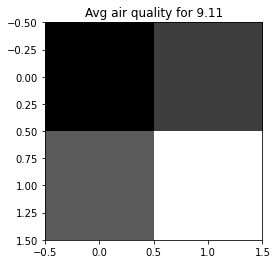

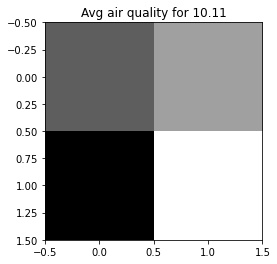

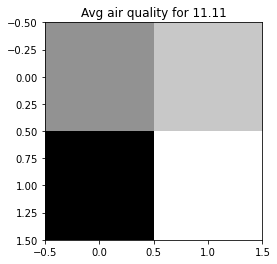

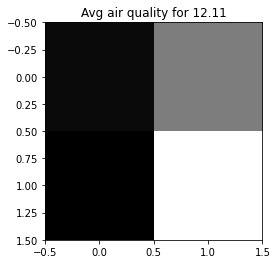

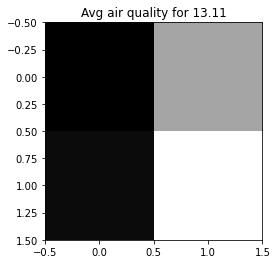

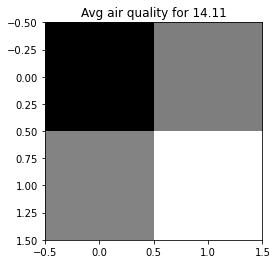

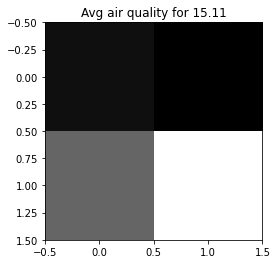

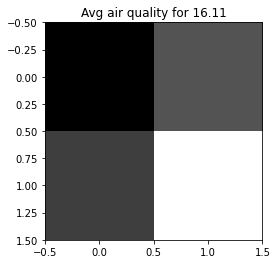

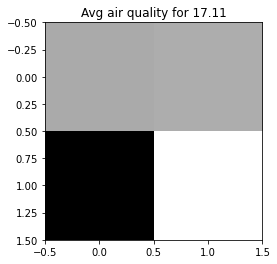

In [114]:
%%local

import matplotlib.pyplot as plt
import numpy as np

def plot(data, day):
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.title('Avg air quality for ' + day)
    plt.show()

plot([[39.48492583038867,32.19988726042841],[28.98913043478261,2.328466929333334]] , '9.11')
plot([[38.36259704647439,26.483072752490227],[53.37716049382716,3.068611810625634]] , '10.11')
plot([[42.59305598684917,28.472729927007304],[78.04813172894237,4.931065941563127]] , '11.11')
plot([[43.207944912936256,29.208893651218855],[44.63598326359833,7.277922549281456]] , '12.11')
plot([[44.74465262948206,26.954223662107033],[43.45990338164251,12.22544747990795]] , '13.11')
plot([[44.13317878356692,30.315543265353156],[29.63263445761167,10.91106451152757]] , '14.11')
plot([[38.083029006374474,39.62007874015747],[30.312805474095796,10.951766599841964]] , '15.11')
plot([[47.91215125104859,37.39908095178143],[39.80543933054393,6.708855898250824]] , '16.11')
plot([[42.77238829962852,41.60623441396509],[92.7298245614035,4.163644859220533]] , '17.11')

## Korzystanie z klastra dla dużych danych
- Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania
- Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania
- Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)

In [9]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-11*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
import time
def zad1():
    start = time.time()
    max_berlin = smog_df.select('city','parameter','value').where((col('city')=='Berlin') & (col('parameter')=='pm10')).agg(_max('value').alias('max')).collect()[0]['max']
    results = smog_df.filter(col('country')=='PL').filter(col('parameter')=='pm10').select('city','value').groupBy('city').agg(_mean('value').alias('avg_value')).where(col('avg_value') < max_berlin).sort(col('avg_value').desc()).toPandas()   
    t = time.time()-start
    print("time:", t)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
zad1() # 1 worker 732.1449844837189

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 732.1449844837189

In [18]:
zad1() # 2 workerów 276.14171719551086

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 276.14171719551086
276.14171719551086

In [16]:
zad1() # 3 workerów 191.61534070968628

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 191.61534070968628
                  city  avg_value
0            Nowa Ruda  47.346611
1              Wschowa  45.487073
2       Janów Lubelski  44.305565
3               Mosina  43.752122
4    Nakło nad Notecią  43.207437
..                 ...        ...
138             Ustroń  17.800164
139             Elbląg  16.703830
140      Rymanów-Zdrój  15.434723
141          Kołobrzeg  14.457873
142       Borsukowizna  12.456109

[143 rows x 2 columns]

In [20]:
zad1() # 4 workerów 183.35758471488953

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 183.35758471488953

In [10]:
zad1() # 5 workerów 137.46806168556213

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 137.46806168556213

In [10]:
zad1() # 6 workerów 104.2424840927124

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 104.2424840927124

In [11]:
zad1() # 7 workerów 88.50783920288086

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

time: 88.50783920288086

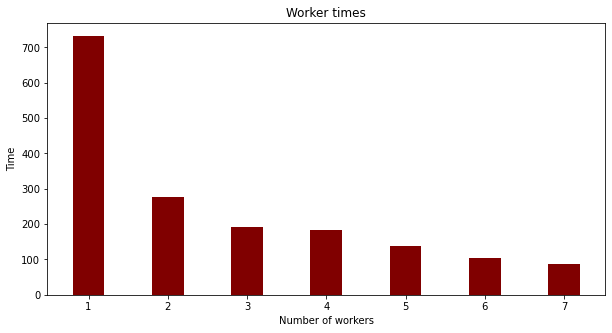

In [12]:
%%local

import matplotlib.pyplot as plt

worker_times = {1: 732.1449844837189, 2: 276.14171719551086, 3: 191.61534070968628, 4: 183.35758471488953, 5: 137.46806168556213, 6: 104.2424840927124, 7: 88.50783920288086}

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(worker_times.keys(), worker_times.values(), color ='maroon', width = 0.4)
 
plt.xlabel("Number of workers")
plt.ylabel("Time")
plt.title("Worker times")
plt.show()

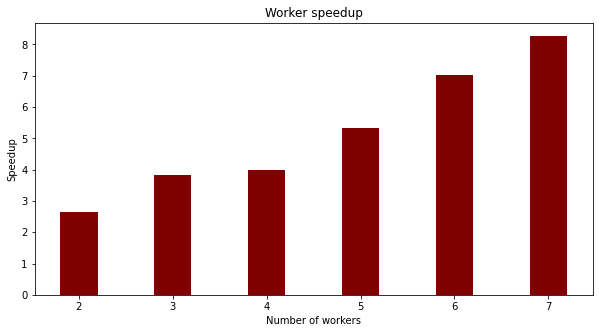

In [13]:
%%local

import matplotlib.pyplot as plt

T1 = 732.1449844837189
worker_times = {2: 276.14171719551086, 3: 191.61534070968628, 4: 183.35758471488953, 5: 137.46806168556213, 6: 104.2424840927124, 7: 88.50783920288086}

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(worker_times.keys(), list(map(lambda x: T1/x, worker_times.values())), color ='maroon', width = 0.4)
 
plt.xlabel("Number of workers")
plt.ylabel("Speedup")
plt.title("Worker speedup")
plt.show()

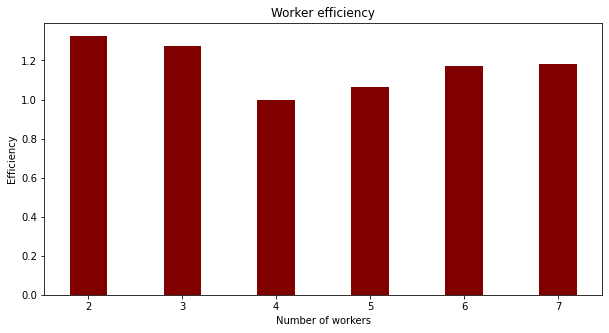

In [14]:
%%local

import matplotlib.pyplot as plt

T1 = 732.1449844837189
worker_times = {2: 276.14171719551086, 3: 191.61534070968628, 4: 183.35758471488953, 5: 137.46806168556213, 6: 104.2424840927124, 7: 88.50783920288086}

efficiency = []

for worker_nr, time in worker_times.items():
    efficiency.append((T1/time)/worker_nr)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(worker_times.keys(), efficiency, color ='maroon', width = 0.4)
 
plt.xlabel("Number of workers")
plt.ylabel("Efficiency")
plt.title("Worker efficiency")
plt.show()

## Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [15]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2020-*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
smog_df.filter(col('parameter')=='pm25').select('country', 'value').groupBy('country').agg(_mean('value').alias('avg_value')).orderBy('avg_value').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|country|          avg_value|
+-------+-------------------+
|     CO| -744.8645286768099|
|     ET| -484.3127872335512|
|     JO| -449.7983879093199|
|     TM| -404.4601550990911|
|     LA|-376.55552992069215|
|     UG|-343.71291316140304|
|     NL| -336.5689880860843|
|     GT| -231.6494065416327|
|     CI|-221.77847037808556|
|     DZ| -199.4726265798546|
|     ID|-180.13476657771656|
|     GN|-171.41653856903298|
|     HU|-154.63625884543924|
|     TD|-151.54618511423632|
|     IQ|-125.91082776053507|
|     MN|-121.28396901072706|
|     ML| -107.8451045771446|
|     CW| -51.83883655570777|
|     SD| -49.79069888013272|
|     NP| -49.77453662931017|
+-------+-------------------+
only showing top 20 rows